In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from IPython.display import Markdown
from ISLP import load_data
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

weekly = load_data("Weekly")
default = load_data("default")
sns.set_theme(style="dark")

# Problem 1

$$
\begin{split}
p(X)&=\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}} \\
\frac{p(X)}{1-p(X)}&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{1-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1+e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1+e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1+e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}-\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}} \\
&=\frac{\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}}}{\frac{1}{1+e^{\beta_0+\beta_1 X}}} \\
&=e^{\beta_0+\beta_1 X}
\end{split}
$$

# Problem 2

## Problem 2.a

On average, $\frac{1}{10}$ of the observations will be used to make the predictions.

## Problem 2.b

On average, $\frac{1}{100}$ of the observations will be used to make the predictions.

## Problem 2.c

On average, $10^{-100}$ of the observations will be used to be used to make the predictions.

## Problem 2.d

As the number of features increase, fewer of the larger set will be used for inference, which will make the model seem relatively 'dumber' as it sees a very local pictures and never really 'understanding' a larger picture, therefore also causing really high variance and overfitting.

## Problem 2.e

$$
\begin{split}
s^{p}&=10^{-1} \\
p\ln s&=-\ln 10 \\
\ln s&=-p^{-1}\ln 10 \\
s&=10^{-p^{-1}}
\end{split}
$$

### p=1

$$
s=10^{-1}=0.1
$$

### p=2

$$
s=10^{-0.5}\approx .32
$$

### p=100

$$
s=10^{-.01}\approx 0.98
$$

# Problem 3

## Problem 3.a

$$
Y=\sigma\left(\hat{\beta}_0+\hat{\beta}_1 X_1+\hat{\beta}_2 X_2\right)=\sigma\left(-6+40\cdot .05+1\cdot 3.5\right)=\sigma(-0.5)\approx .377
$$

## Problem 3.b

$$
\begin{split}
0.5&=\sigma\left(\hat{\beta}_0+\hat{\beta}_1 X_1+\hat{\beta}_2 X_2\right)=\sigma\left(-6+0.05h+3.5\right) \\
0.5&=\sigma\left(0.05h-2.5\right)
h\approx 50
\end{split}
$$

# Problem 4

We would prefer the regression, because the $K=1$ KNN will have a $0\%$ error on the training data ( the NN of any data point in the training data set will just be itself ), which means that it had a $36\%$ error on the testing data. Scince the $36\%$ test error for KNN is more than the $30\%$ error on the linear regression, we would prefer the regression to classify new observations.

# Problem 5

## Problem 5.a

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


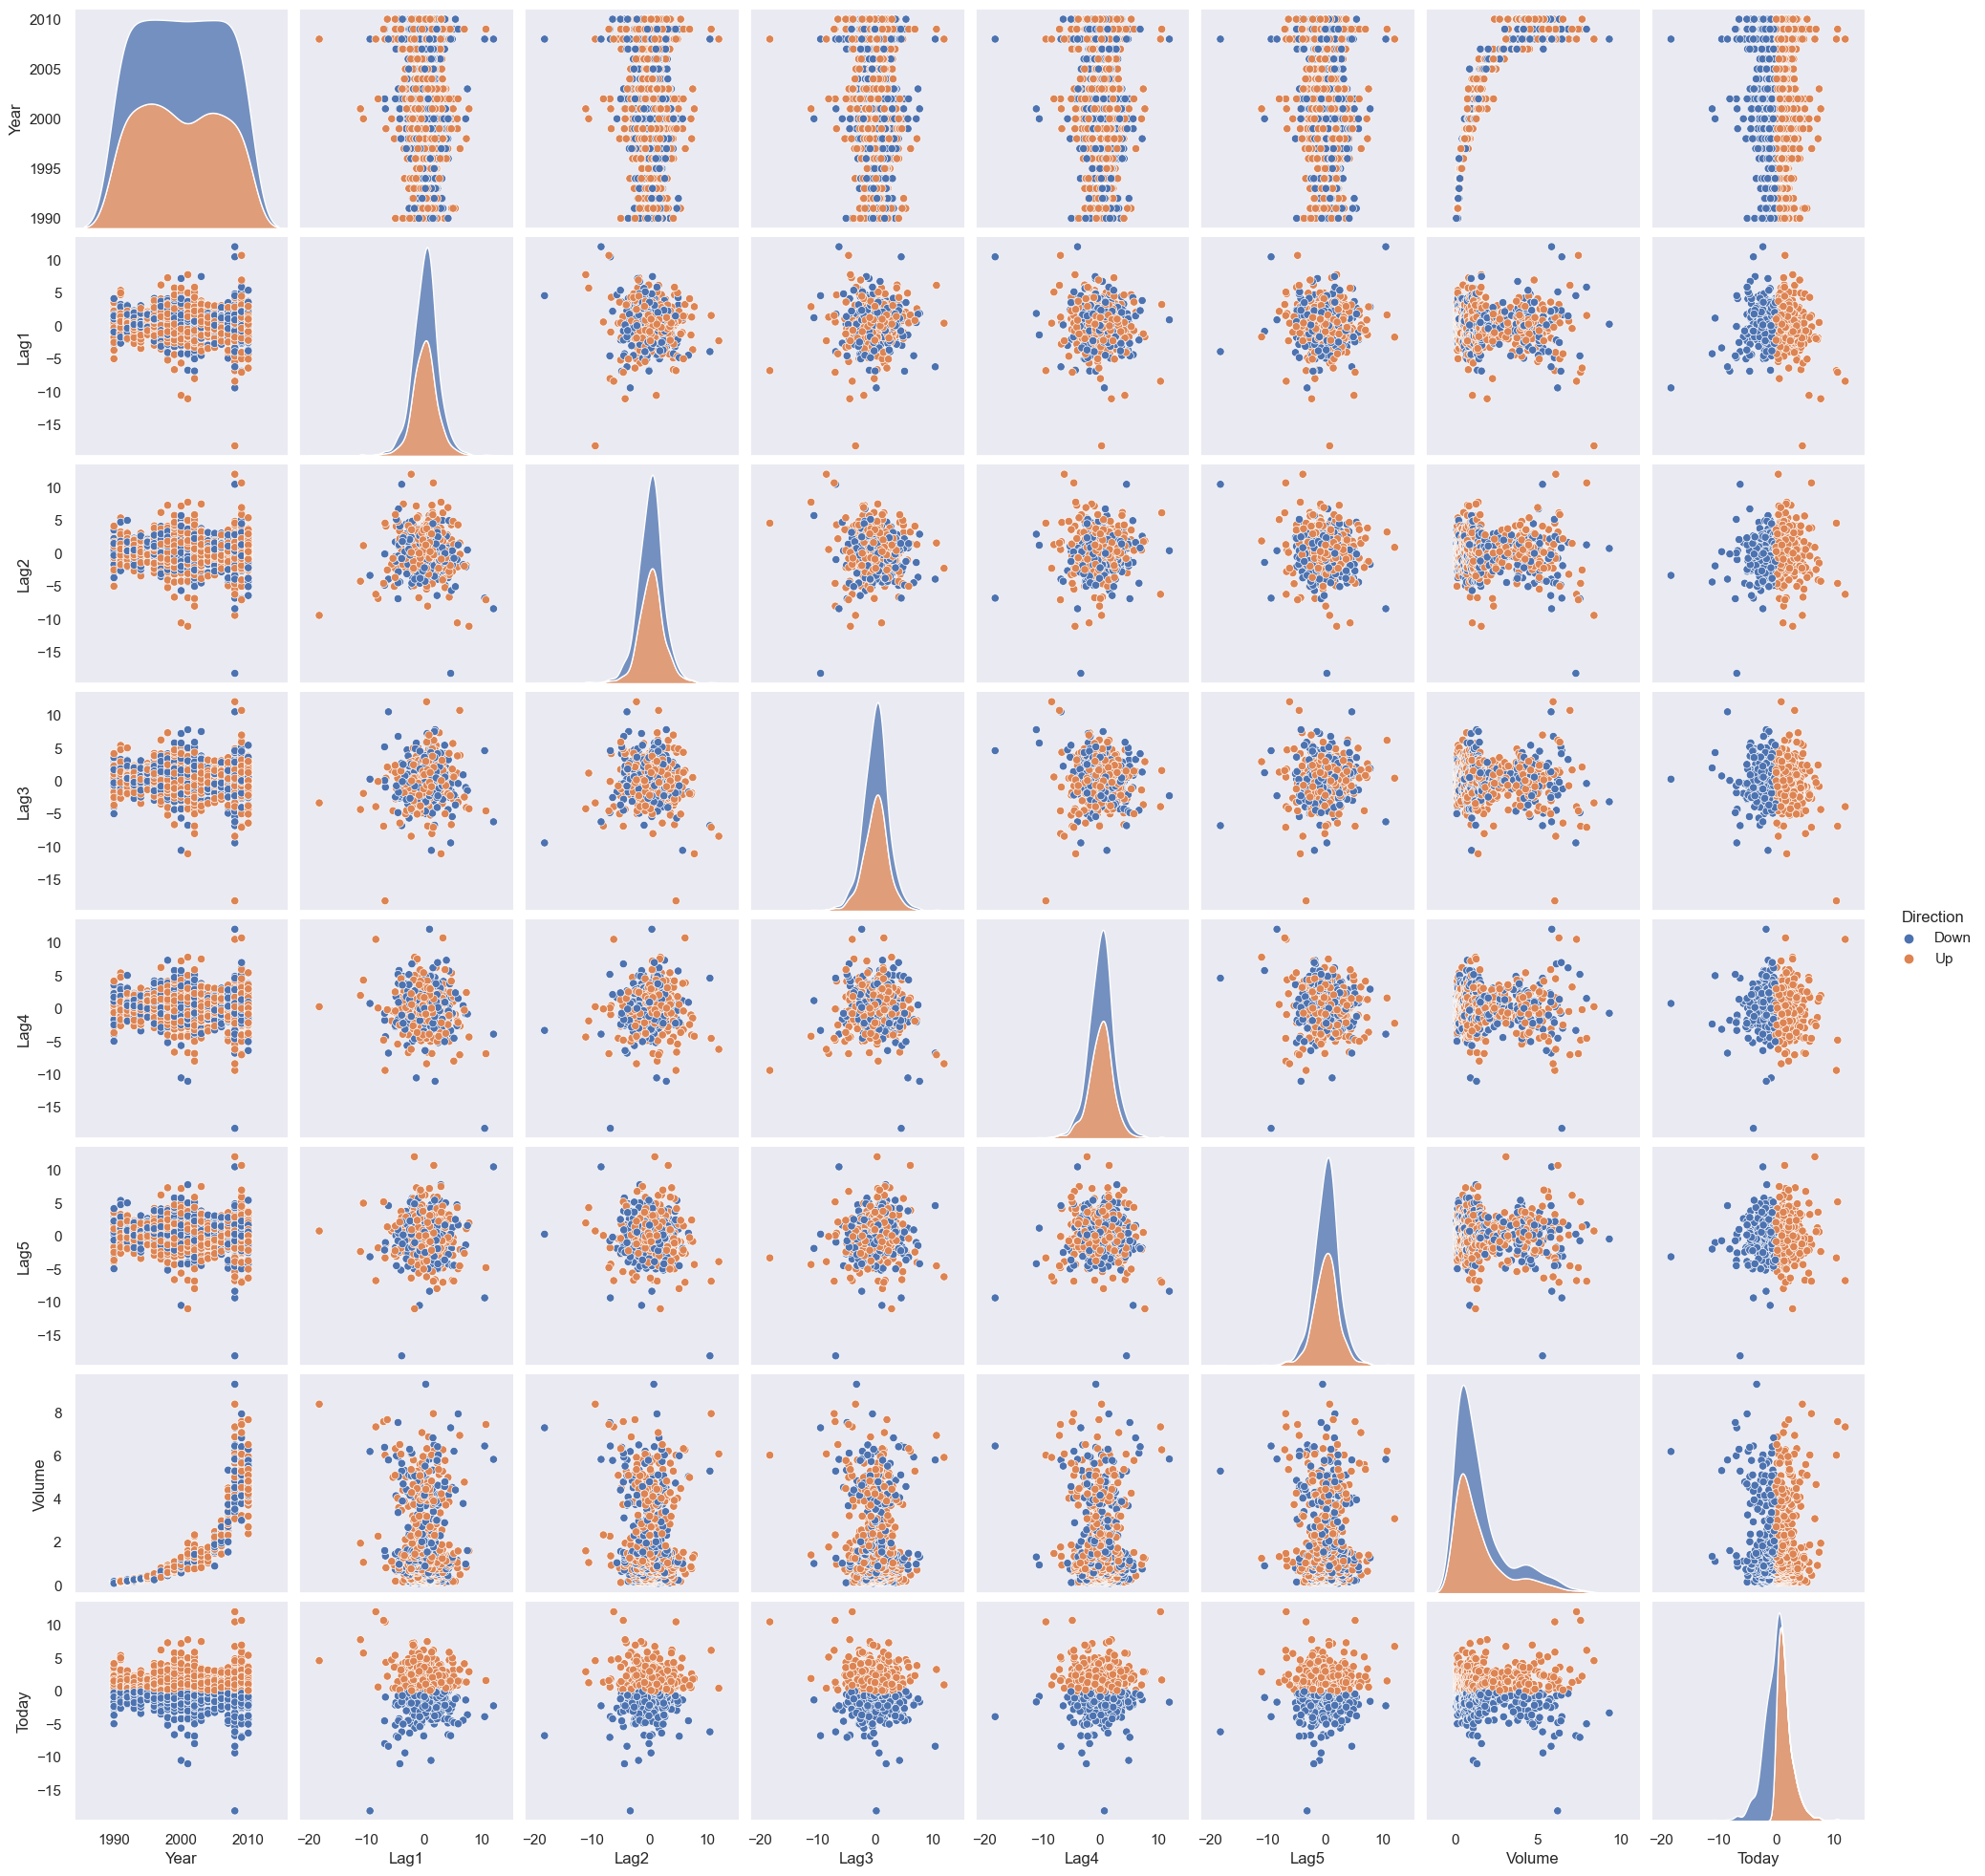

In [42]:
# | warning: false
sns.pairplot(weekly, hue="Direction", diag_kws={"multiple": "stack"})

From looking at the graphs, we can see that Today is clustered by Direction and there is a correlation between Volume and year.

## Problem 5.b

In [43]:
weekly_binary = weekly.assign(Direction=(weekly["Direction"] == "Up").astype(int))
model = smf.logit(
    "Direction ~ Volume + Lag1 + Lag2 + Lag3 + Lag4 + Lag5", data=weekly_binary
).fit(disp=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                0.006580
Time:                        17:34:39   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
==============================================================================
"""

Lag2 is the only statistically significant correlation.

## Problem 5.c

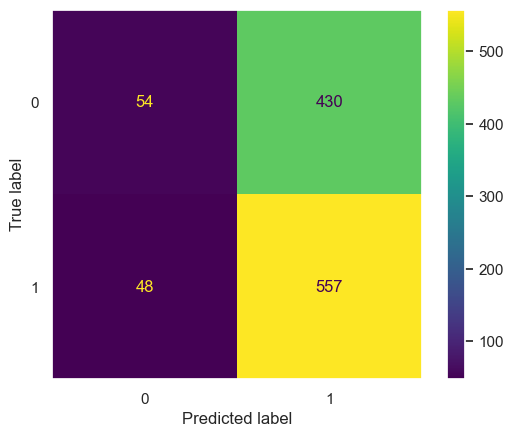

In [44]:
prediction = model.predict(
    weekly_binary[["Volume", "Lag1", "Lag2", "Lag3", "Lag4", "Lag5"]]
).round()
ConfusionMatrixDisplay.from_predictions(weekly_binary["Direction"], prediction)
plt.show()

We can see that the model is very hesitant to guess 0, so it has a very low recall,

## Problem 5.d

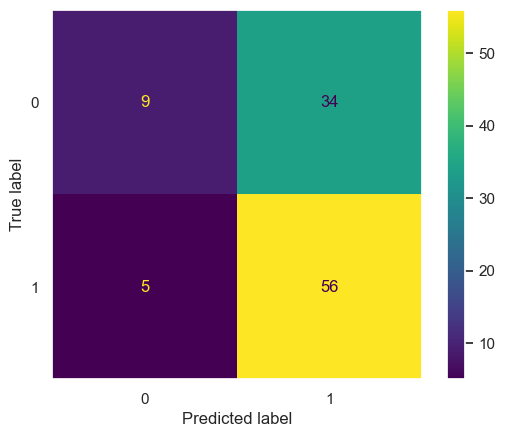

In [45]:
weekly_training = weekly[weekly["Year"] <= 2008]
weekly_training_binary = weekly_training.assign(
    Direction=(weekly_training["Direction"] == "Up").astype(int)
)
weekly_testing = weekly[weekly["Year"] >= 2009]
weekly_testing_binary = weekly_testing.assign(
    Direction=(weekly_testing["Direction"] == "Up").astype(int)
)
model = smf.logit("Direction ~ Lag2", data=weekly_training_binary).fit(disp=False)
prediction = model.predict(weekly_testing_binary[["Lag2"]]).round()
ConfusionMatrixDisplay.from_predictions(weekly_testing_binary["Direction"], prediction)
plt.show()

## Probelm 5.e

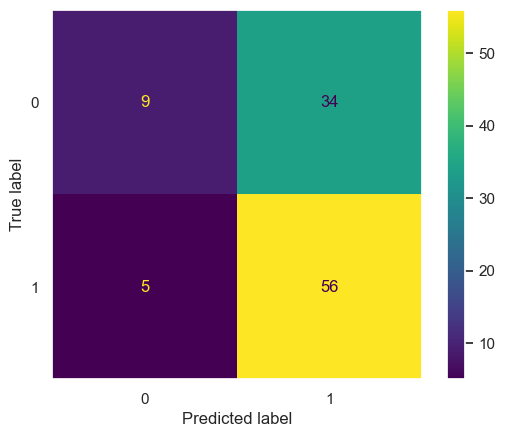

In [46]:
model = LinearDiscriminantAnalysis().fit(
    weekly_training_binary[["Lag2"]], weekly_training_binary["Direction"]
)
prediction = model.predict(weekly_testing_binary[["Lag2"]]).round()
ConfusionMatrixDisplay.from_predictions(weekly_testing_binary["Direction"], prediction)
plt.show()

## Problem 5.f

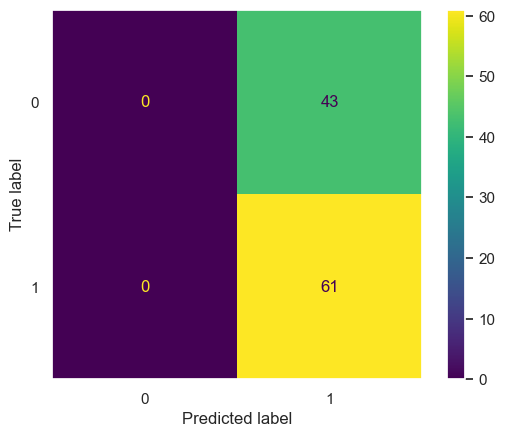

In [47]:
model = QuadraticDiscriminantAnalysis().fit(
    weekly_training_binary[["Lag2"]], weekly_training_binary["Direction"]
)
prediction = model.predict(weekly_testing_binary[["Lag2"]]).round()
ConfusionMatrixDisplay.from_predictions(weekly_testing_binary["Direction"], prediction)
plt.show()

## Problem 5.g

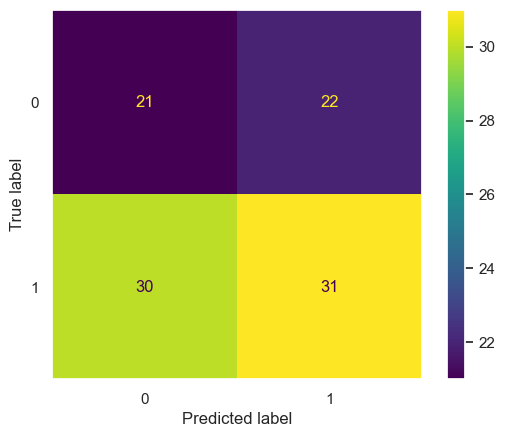

In [48]:
model = KNeighborsClassifier(n_neighbors=1).fit(
    weekly_training_binary[["Lag2"]], weekly_training_binary["Direction"]
)
prediction = model.predict(weekly_testing_binary[["Lag2"]]).round()
ConfusionMatrixDisplay.from_predictions(weekly_testing_binary["Direction"], prediction)
plt.show()

## Probem 5.h

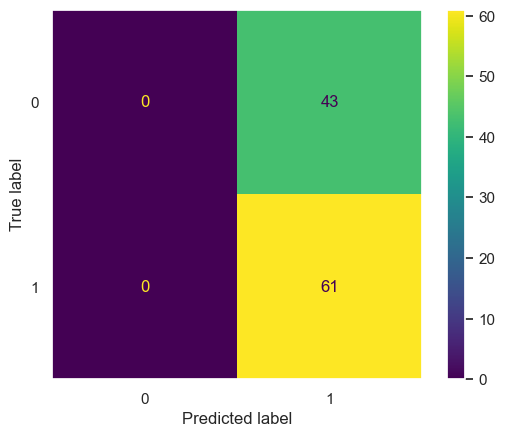

In [49]:
model = GaussianNB().fit(
    weekly_training_binary[["Lag2"]], weekly_training_binary["Direction"]
)
prediction = model.predict(weekly_testing_binary[["Lag2"]]).round()
ConfusionMatrixDisplay.from_predictions(weekly_testing_binary["Direction"], prediction)
plt.show()

# Problem 6

## Problem 6.a

Each bootstrap observation has a $\frac{1}{n}$ chance of being equal to the $j$th element of the original sample, so it has a $1-\frac{1}{n}=\frac{n-1}{n}$ chance of not being the $j$th observation.

## Problem 6.b

Every bootstrap observation is sampled identically, so it is also $\frac{n-1}{n}$

## Problem 6.c

Each bootstrap observation has a $1-\frac{1}{n}$ probability of not being the $j$th observation, so the chance that every one of $n$ bootsrap observations in a bootstrap sample of size $n$ is not the $j$th observation is $\left(1-\frac{1}{n}\right)^n$.

## Problem 6.d

$\left(1-\frac{1}{n}\right)^n=\left(1-\frac{1}{5}\right)^5\approx 0.33$

## Problem 6.e

$\left(1-\frac{1}{n}\right)^n=\left(1-\frac{1}{100}\right)^{100}\approx 0.37$

## Problem 6.f

$\left(1-\frac{1}{n}\right)^n=\left(1-\frac{1}{10000}\right)^{10000}\approx 0.37$

## Problem 6.g

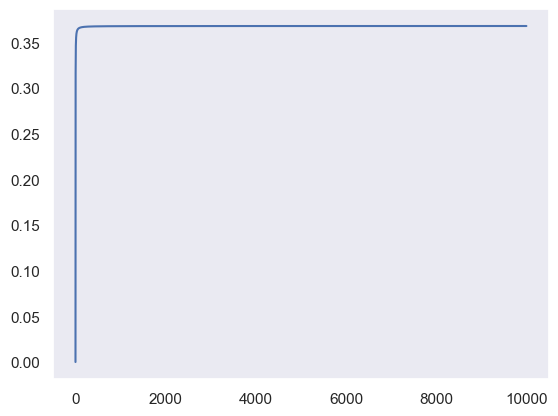

In [50]:
x = np.arange(1, 10000)
sns.lineplot((1 - 1 / x) ** x)
plt.show()

$\left(1-\frac{1}{n}\right)^n$ increases and asymptotes to $e^{-1}$.

## Python 6.h

In [51]:
rng = np.random.default_rng(10)
store = np.empty(10000)
for i in range(10000):
    store[i] = np.sum(rng.choice(100, replace=True) == 4) > 0
np.mean(store)

0.0089

In [52]:
np.random.seed(10)
np.mean(np.random.randint(1, 100, 10000) == 4)

0.0121

These are both very different from the estimate of $\left(1-\frac{1}{100}\right)^{100}=.37$; the python ones are significantly lower and the R is is significantly higher.

# Problem 7

## Probblem 7.a

In [53]:
default_binary = default.assign(
    default=(default["default"] == "Yes").astype(int),
    student=(default["student"] == "Yes").astype(int),
)
model = smf.logit("default ~ income + balance", data=default_binary).fit(disp=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4594
Time:                        17:34:40   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Problem 7.b

In [54]:
default_binary_train, default_binary_test = train_test_split(
    default_binary, test_size=0.5, random_state=42
)
model = smf.logit("default ~ income + balance", data=default_binary_train).fit(
    disp=False
)
prediction = model.predict(default_binary_test[["income", "balance"]]).round()
Markdown(
    "The error is: "
    + str(
        sum(prediction != default_binary_test["default"])
        / len(default_binary_test["default"])
    )
)

The error is: 0.0258

## Problem 7.c

In [55]:
splits = [0.25, 0.5, 0.75]
errors = []
for split in splits:
    default_binary_train, default_binary_test = train_test_split(
        default_binary, test_size=split, random_state=42
    )
    model = smf.logit("default ~ income + balance", data=default_binary_train).fit(
        disp=False
    )
    prediction = model.predict(default_binary_test[["income", "balance"]]).round()
    error = sum(prediction != (default_binary_test["default"])) / len(
        default_binary_test["default"]
    )
    errors.append(error)
pd.DataFrame({"Training Split": splits, "Error": errors})

,Training Split,Error
0,0.25,0.027600
1,0.50,0.025800
2,0.75,0.026667


From these there seems to be a almost parabolic motion centered somewhere around $0.5$, such that increasing or decreasing the training split will derease performance on the testing data.

## Problem 7.d

In [56]:
default_binary_train, default_binary_test = train_test_split(
    default_binary, test_size=0.5, random_state=42
)
model = smf.logit(
    "default ~ student + income + balance", data=default_binary_train
).fit(disp=False)
prediction = model.predict(
    default_binary_test[["student", "income", "balance"]]
).round()
Markdown(
    "The error is: "
    + str(
        sum(prediction != default_binary_test["default"])
        / len(default_binary_test["default"])
    )
)

The error is: 0.0256

This error is an improvment over the version without student, which means that student is providing more information to the model rather than just providing a point of overfitting for the training.

# Problem 8

## Problem 8.a

In [57]:
model = smf.logit("default ~ income + balance", data=default_binary).fit(disp=False)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.4594
Time:                        17:34:40   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Problem 8.b

In [58]:
def boot_fn(data, indexes):
    return (
        smf.logit("default ~ income + balance", data=data.loc[indexes])
        .fit(disp=False)
        .params
    )

## Problem 8.c

In [59]:
np.random.seed(42)
params = []
for i in range(1000):
    params.append(
        boot_fn(
            default_binary, np.random.choice(default_binary.index, len(default_binary))
        )
    )

In [60]:
pd.DataFrame(
    {"std err": np.std(params, axis=0)}, index=["Intercept", "income", "balance"]
)

,std err
Intercept,0.434501
income,0.000005
balance,0.000232


The intercept and income std is nearly idenctical, while the balance std is very different ( $0$ in the prediction while small but nonzero in the bootstrapping ).